# LDA (Linear Discriminant Analysis)
- 타겟 클래스 간 분리를 최대로 하는 축으로 결정

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name() # 한글 폰트 이름 가져오기
matplotlib.rc('font', family=font) # 한글 폰트 사용 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 사용 설정

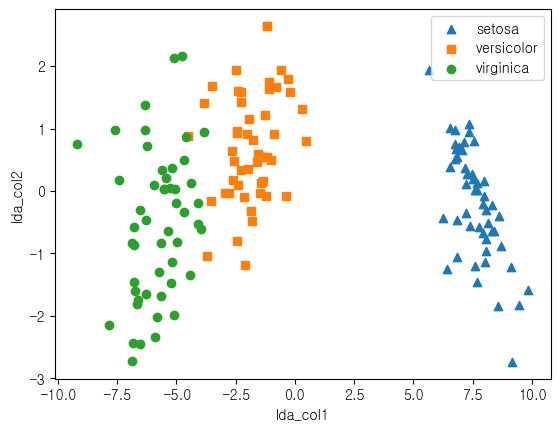

In [ ]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler


iris_data = load_iris()

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_data.data)
# 데이터 분산이 잘되게 하는 목적이 있기 때문에 lda와 pca를 사용할 때는 데이터 전처리 과정에서 표준화를 해줘야 함

lda = LinearDiscriminantAnalysis(n_components=2)
iris_lda = lda.fit_transform(iris_scaled.data, iris_data.target) # 지도학습이기 때문에 타겟 데이터도 필요
# class 간의 분리를 최대로 하고 class 내부의 분산을 최소화하는 축을 찾아서 차원을 줄임
# iris_lda.shape # (150, 2)

iris_lda_df = pd.DataFrame(iris_lda, columns=['lda_col1', 'lda_col2'])
iris_lda_df['target'] = iris_data.target

# 축소한 차원으로 시각화
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    X = iris_lda_df[iris_lda_df['target'] == i]['lda_col1']
    y = iris_lda_df[iris_lda_df['target'] == i]['lda_col2']
    plt.scatter(X, y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('lda_col1')
plt.ylabel('lda_col2')
plt.show()